# Agglomerative Clustering

- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
- Take a look at https://stats.stackexchange.com/questions/195446/choosing-the-right-linkage-method-for-hierarchical-clustering

* 💡 Agglomerative clustering is a **bottom-up approach** to clustering.
    * We first divide **each instance into its own cluster** and **merge them into couples** based on a similarity metric.
    * Subsequently we compute the **similarity** again and **merge the couples into bigger groups** (clusters).
    * These groups are then merged into the bigger ones **till there is only a one big group containing all the instances present at the top**.

### 🚀 **We don't have to know the number of clusters beforehand.**  
* 💡 We can perform the whole clustering process and **select the appropriate number of clusters afterward** based on the obtained results. 
* We usually use the **dendrogram** for the distance threshold estimation.

## 🔎 You may ask how is the similarity among groups computed. 
* 💡 **Similarity is pretty hard to define.**
* There are various ways how we can compute the value called **Linkage**.

## 💡 Linkage variants
- **Maximum or Complete linkage**:
    - The distance between two clusters is defined as the maximum value of all pairwise distances between the elements in cluster 1 and the elements in cluster 2.
    - It tends to produce more compact clusters.
    - It is less prone to outliers than Single linkage.
    - Complete linkage methods tend to break large clusters.


- **Minimum or Single linkage**:
    - The distance between two clusters is defined as the minimum value of all pairwise distances between the elements in cluster 1 and the elements in cluster 2.
    - It tends to produce long, “loose” clusters.
    - Single linkage method is prone to "chain" and form clusters of irregular, often thread-like curved shapes.
        - The reason for that is obvious. With this method, at any step, **two clusters are merged if their closest edges are close enough**.
        - No proximity between other parts of the two clusters is taken into consideration.


- **Mean or Average linkage**:
    - The distance between two clusters is defined as the average distance between the elements in cluster 1 and the elements in cluster 2.

![img1](https://github.com/lowoncuties/VSB-FEI-Machine-Learning-Exercises/blob/main/images/ml_03_linkages.png?raw=true)


## Metrics
![img2](https://github.com/lowoncuties/VSB-FEI-Machine-Learning-Exercises/blob/main/images/ml_03_euclid.png?raw=true)

![img3](https://github.com/lowoncuties/VSB-FEI-Machine-Learning-Exercises/blob/main/images/ml_03_manhattan.png?raw=true)



## Imports

In [2]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import csv
from matplotlib import pyplot as plt
import math
from sklearn.metrics import pairwise

## Load files

In [3]:
data = pd.read_csv('datasets/ml_03/clusters3.csv', sep=';')
X = data.values

In [4]:
def euclidean(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [5]:
def manhattan(point1, point2):
    return np.sum(np.abs(point1 - point2))

In [6]:
def single_linkage(cluster1, cluster2):
    return min([euclidean(p1, p2) for p1 in cluster1 for p2 in cluster2])


In [7]:
def complete_linkage(cluster1, cluster2):
    return max(euclidean(p1, p2) for p1 in cluster1 for p2 in cluster2)

In [8]:
def single_linkage_manhattan(point1, point2):
    return min([manhattan(p1, p2) for p1 in point1 for p2 in point2])

In [9]:
def complete_linkage_manhattan(point1, point2):
    return max([manhattan(p1, p2) for p1 in point1 for p2 in point2])

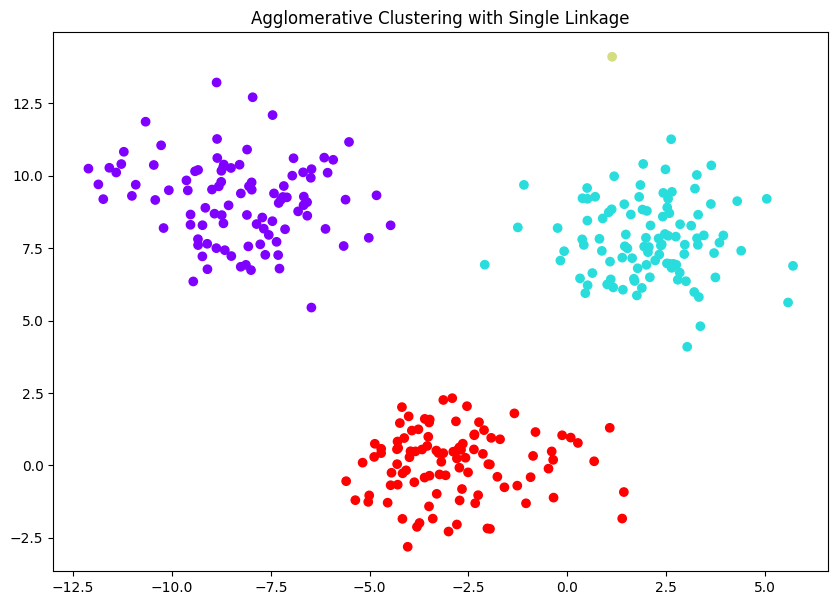

In [10]:
def agglomerative_clustering(X, n_clusters):
    clusters = [[x] for x in X]
    
    while len(clusters) > n_clusters:
        min_dist = float('inf')
        to_merge = (0, 1)
        
        for i in range (len(clusters)):
            for j in range(i+1, len(clusters)):
                dist = single_linkage(clusters[i], clusters[j])
                if dist < min_dist:
                    min_dist = dist
                    to_merge = (i, j)
        i, j = to_merge
        clusters[i].extend(clusters[j])
        del clusters[j]
    
    
    labels = np.zeros(len(X), dtype=int)
    for cluster_id, cluster in enumerate(clusters):
        for point in cluster:
            point_index = np.where((X == point).all(axis=1))[0][0]
            labels[point_index] = cluster_id
    return labels

labels = agglomerative_clustering(X, 4)


plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title('Agglomerative Clustering with Single Linkage')
plt.show()


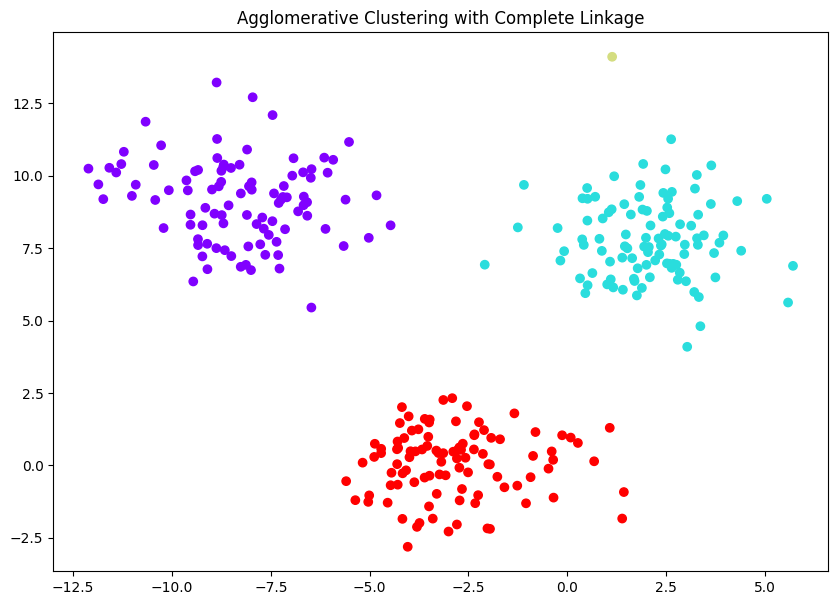

In [11]:
def agglomerative_clustering_complete(X, n_clusters):
    clusters = [[x] for x in X]  
    while len(clusters) > n_clusters:
        min_dist = float('inf')
        to_merge = (0, 1)
        
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = complete_linkage(clusters[i], clusters[j])
                if dist < min_dist:
                    min_dist = dist
                    to_merge = (i, j)
        
        i, j = to_merge
        clusters[i].extend(clusters[j])
        del clusters[j]
        
    labels = np.zeros(len(X), dtype=int)
    for cluster_id, cluster in enumerate(clusters):
        for point in cluster:
            point_index = np.where((X == point).all(axis=1))[0][0]
            labels[point_index] = cluster_id
    return labels

labels_complete = agglomerative_clustering_complete(X, 4)
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=labels_complete, cmap='rainbow')
plt.title('Agglomerative Clustering with Complete Linkage')
plt.show()

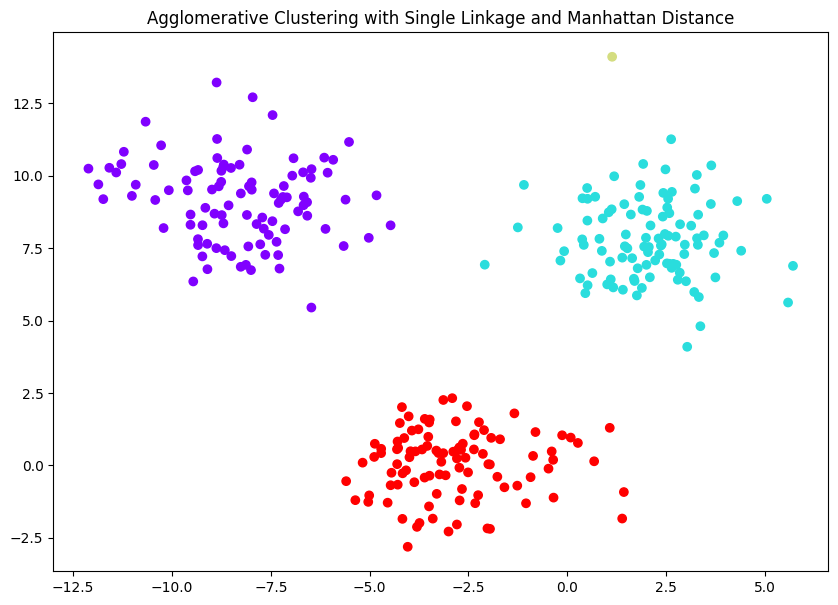

In [12]:
def agglomerative_clustering_single_manhattan(X, n_clusters):
    clusters = [[x] for x in X]
    while len(clusters) > n_clusters:
        min_dist = float('inf')
        to_merge = (0, 1)
        
        for i in range(len(clusters)):
            for j in range (i+1, len(clusters)):
                distance = single_linkage_manhattan(clusters[i], clusters[j])
                if distance < min_dist:
                    min_dist = distance
                    to_merge = (i, j)
        i,j = to_merge
        clusters[i].extend(clusters[j])
        del clusters[j]
    
    labels = np.zeros(len(X), dtype=int)
    for cluster_id, cluster in enumerate(clusters):
        for point in cluster:
            point_index = np.where((X == point).all(axis=1))[0][0]
            labels[point_index] = cluster_id
    return labels

labels_single_manhattan = agglomerative_clustering_single_manhattan(X, 4)
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=labels_single_manhattan, cmap='rainbow')
plt.title('Agglomerative Clustering with Single Linkage and Manhattan Distance')
plt.show()

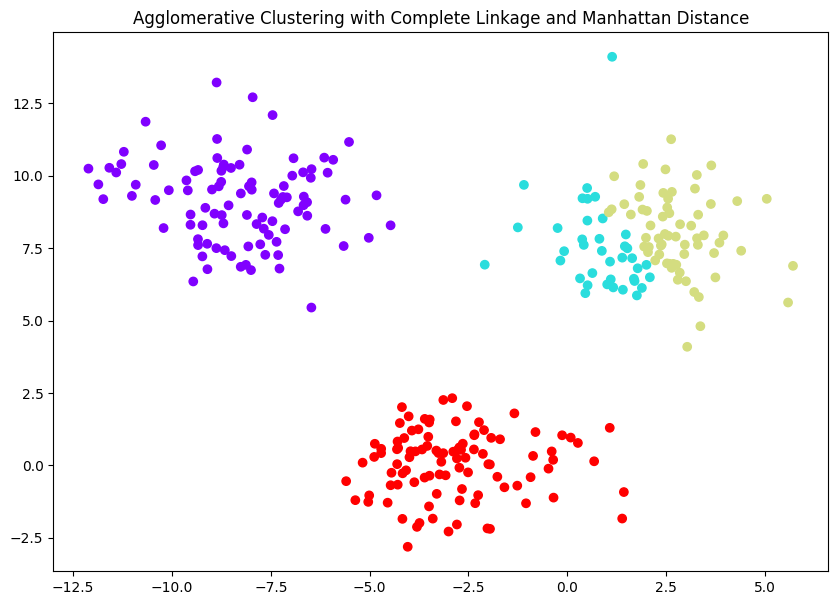

In [13]:
def agglomerative_clustering_complete_manhattan(X, n_clusters):
    clusters = [[x] for x in X]
    while len(clusters) > n_clusters:
        min_dist = float('inf')
        to_merge = (0, 1)
        
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                distance = complete_linkage_manhattan(clusters[i], clusters[j])
                if distance < min_dist:
                    min_dist = distance
                    to_merge = (i, j)
        i, j = to_merge
        clusters[i].extend(clusters[j])
        del clusters[j]
    
    labels = np.zeros(len(X), dtype=int)
    for cluster_id, cluster in enumerate(clusters):
        for point in cluster:
            point_index = np.where((X == point).all(axis=1))[0][0]
            labels[point_index] = cluster_id
    return labels

labels_complete_manhattan = agglomerative_clustering_complete_manhattan(X, 4)
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=labels_complete_manhattan, cmap='rainbow')
plt.title('Agglomerative Clustering with Complete Linkage and Manhattan Distance')
plt.show()